# Imports

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from numpy import log
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline
from pandas.plotting import autocorrelation_plot

c:\users\brian\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("./jpm_daily_close.csv",index_col=0)
df['datetime']=pd.to_datetime(df['datetime'])
df=df.dropna().reset_index(drop=True)

In [3]:
train = df.loc[df['datetime']<=pd.datetime(2019,1, 27)]
test = df.loc[df['datetime']>pd.datetime(2019,1, 27)]

c:\users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
c:\users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Checks if series is stationary

In [4]:
result = adfuller(df.price.dropna())
print(f'ADF Statistic: {result[0]}' % result[0])
print(f'p-value: {result[1]}')

ADF Statistic: -0.08356599577509487
p-value: 0.951051021123272


In [5]:
#p-value > .05

In [6]:
result = train['price'].diff().dropna()
print("P-val:", adfuller(result.dropna())[1])

P-val: 6.276342699249687e-30


In [7]:
data = df['price']
model = ARIMA(data, order=(5, 1, 0))
model = model.fit(disp=0)
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 3241
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -16536.795
Method:                       css-mle   S.D. of innovations             39.783
Date:                Fri, 29 Jan 2021   AIC                          33087.590
Time:                        22:20:37   BIC                          33130.175
Sample:                             1   HQIC                         33102.848
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6045      0.730      2.198      0.028       0.174       3.035
ar.L1.D.price     0.0613      0.018      3.493      0.000       0.027       0.096
ar.L2.D.price     0.0047      0.018     

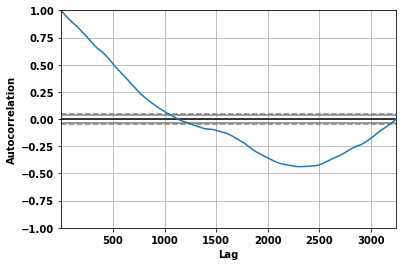

<Figure size 1200x800 with 0 Axes>

In [8]:
autocorrelation_plot(data)
plt.figure(figsize=(12, 8), dpi=100)
plt.show() 

In [ ]:
X = df.price.values
train_indices = int(len(X) * 0.80)
train, test = X[0:train_indices], X[train_indices:len(X)]
result = [x for x in train]
predictions = list()
for idx in range(len(test)):
  model = ARIMA(result, order=(5,1,0))
  fit_model = model.fit(disp=0)
  output = fit_model.forecast()
  y_pred = output[0]
  predictions.append(y_pred)
  result.append(test[idx])

In [ ]:
error = mean_squared_error(test, predictions)
print(f'Test MSE: {error:.3}')

In [ ]:
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.xlabel('Days')
plt.ylabel('$')
plt.title('ARIMA forecast JPMorgan close')
plt.legend()
plt.show()